## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = mouse_metadata.merge(study_results, on='Mouse ID')

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_data['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_group = mouse_data.groupby(['Mouse ID', 'Timepoint']).count()
mouse_group.loc[mouse_group['Sex'] > 1]
# This result shows only Mouse ID 'g989' has multiple rows for the same timepoints

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data.loc[mouse_data['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data.drop(mouse_data[mouse_data['Mouse ID'] == 'g989'].index, inplace=True)
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_data['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = mouse_data.groupby(['Drug Regimen'])
regimen_group.head()

mean = regimen_group['Tumor Volume (mm3)'].mean()
median = regimen_group['Tumor Volume (mm3)'].median()
variance = regimen_group['Tumor Volume (mm3)'].var()
stdev = regimen_group['Tumor Volume (mm3)'].std()
sem = regimen_group['Tumor Volume (mm3)'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_data = {'Mean': mean,
                'Median': median,
                'Variance': variance,
                'Standard Deviation': stdev, 
                'SEM' : sem}
regimen_stats = pd.DataFrame(regimen_data)
regimen_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_stats = mouse_data.groupby('Drug Regimen').agg(
                    Mean = pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc = np.mean), 
                    Median = pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc = np.median),
                    Variance = pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc = np.var),
                    Standard_Deviation = pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc = np.std),
                    SEM = pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc = st.sem),)
regimen_stats

# This method produces everything in a single groupby function


,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

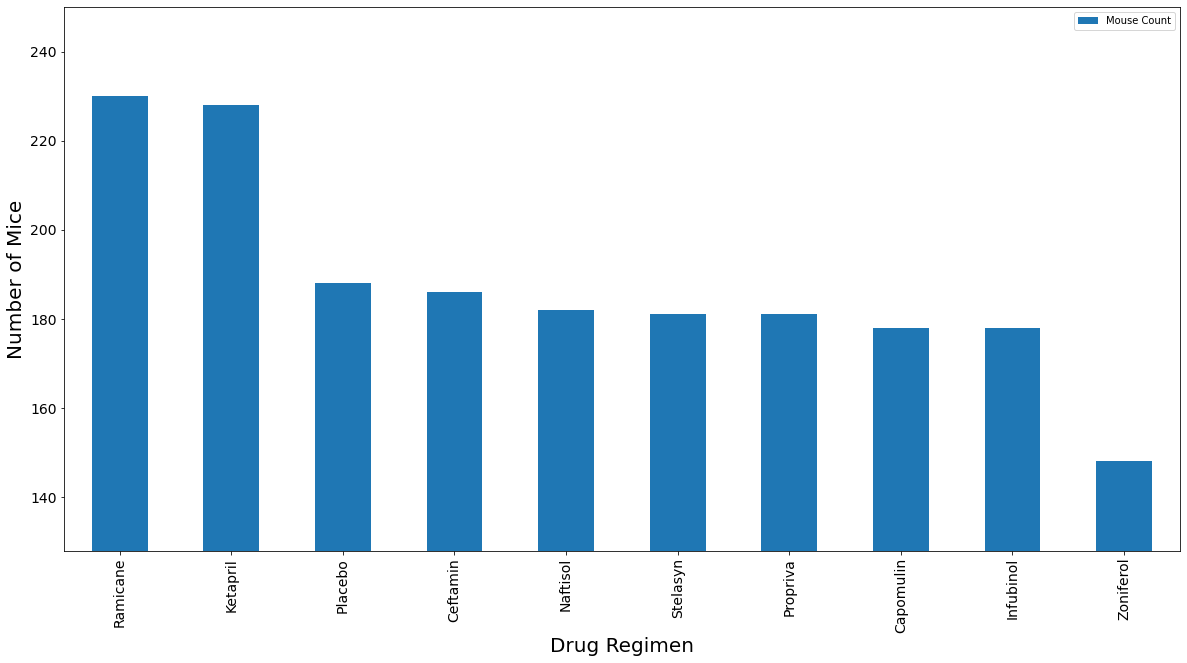

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

# Creating panda
data = {'Drug Regimen' : ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
                          'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
        'Mouse Count' : [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]}
mouse_count = pd.DataFrame(data, columns = ['Drug Regimen', 'Mouse Count'])
mouse_count = mouse_count.set_index('Drug Regimen')
mouse_count = mouse_count.sort_values(by='Mouse Count', ascending=False)

# Creating bar plot
mouse_plot = mouse_count.plot(kind='bar', figsize=(20,10))
plt.ylim(min(mouse_count["Mouse Count"])-20, max(mouse_count["Mouse Count"])+20)
plt.xlabel('Drug Regimen', fontsize='20')
plt.ylabel("Number of Mice", fontsize='20')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()

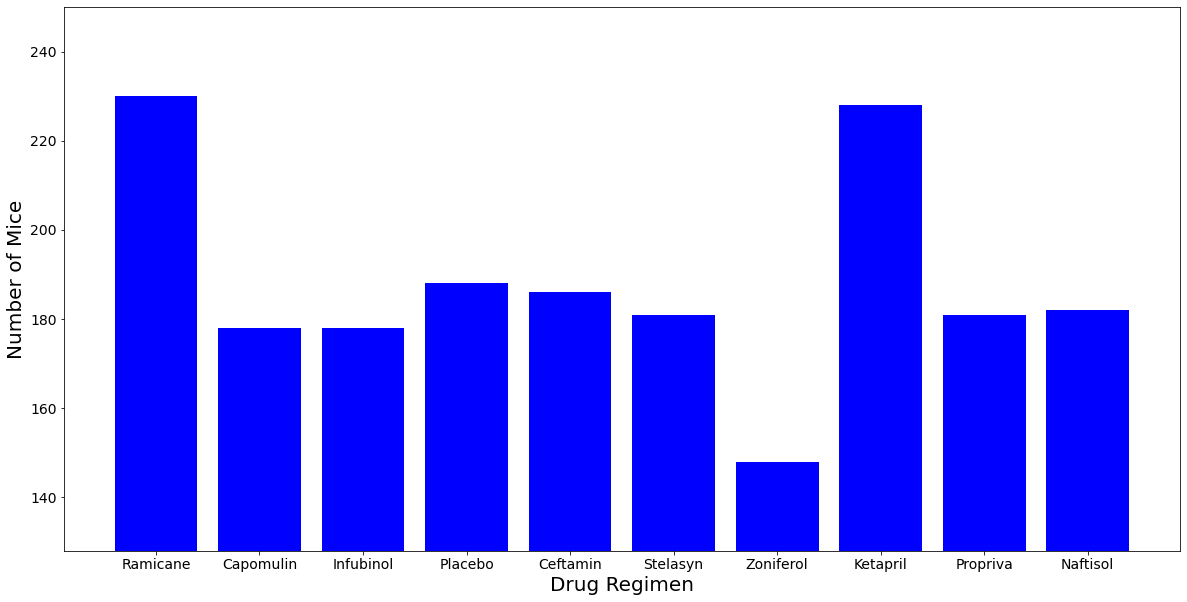

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_regimen = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
                'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
mouse_count =  [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
x_axis = np.arange(len(mouse_count))

plt.figure(figsize=(20,10)) 
plt.bar(x_axis, mouse_count, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen)
plt.ylim(min(mouse_count)-20, max(mouse_count)+20)
plt.xlabel('Drug Regimen', fontsize='20')
plt.ylabel("Number of Mice", fontsize='20')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()

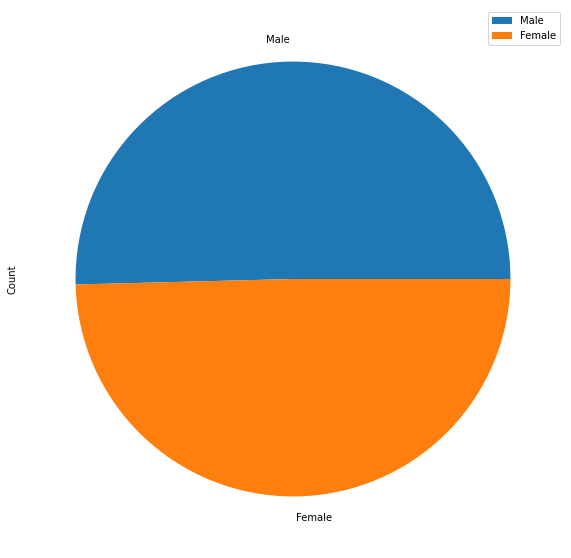

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

data = {'Sex': ['Male', 'Female'],
        'Count': [125, 123]}
mouse_count = pd.DataFrame(data, columns = ['Sex', 'Count'])
mouse_count = mouse_count.set_index('Sex')
mouse_count = mouse_count.sort_values(by='Count', ascending=False)

# Creating pie plot
mouse_plot = mouse_count.plot(kind='pie', y='Count', figsize=(20,10))
plt.show()

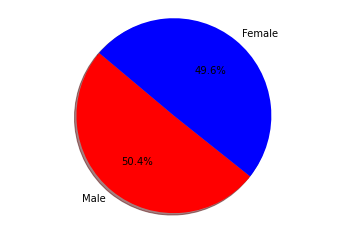

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Checking counts
mouse_data_sex = mouse_data.drop(mouse_data.columns[[1,3,4,5,6,7]], axis = 1)
mouse_data_sex = mouse_data_sex.drop_duplicates()
mouse_data_sex = mouse_data_sex.groupby(['Sex']).count().rename(columns={'Sex':'Sex','Mouse ID' : 'Count'})
mouse_data_sex.head()

# Creating pie plot
sex_types = ['Male', 'Female']
sex_counts = [125, 123]
colors = ['Red', 'Blue']
plt.pie(sex_counts, labels=sex_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

top_regimens = mouse_data[mouse_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = top_regimens.groupby(['Drug Regimen', 'Mouse ID'], as_index=False)
max_data = mouse_group.max()
max_data.head(30)

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,Female,9,22,45,45.651331,2
1,Capomulin,b742,Male,7,21,45,45.000000,0
2,Capomulin,f966,Male,16,17,20,45.000000,0
3,Capomulin,g288,Male,3,19,45,46.304003,1
4,Capomulin,g316,Female,22,22,45,46.809225,2
5,Capomulin,i557,Female,1,24,45,47.685963,1
6,Capomulin,i738,Female,23,20,45,45.595685,2
7,Capomulin,j119,Female,7,23,45,48.158209,1
8,Capomulin,j246,Female,21,21,35,46.408361,1
9,Capomulin,l509,Male,17,21,45,48.070452,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = max_data['Tumor Volume (mm3)'].values
tumor_vols_df = pd.DataFrame(tumor_vols)
tumor_vols_df

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vols_df[0].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 

    
    # Determine outliers using upper and lower bounds

Values below 23.87921808625 could be outliers.
Values above 81.56088795625001 could be outliers.


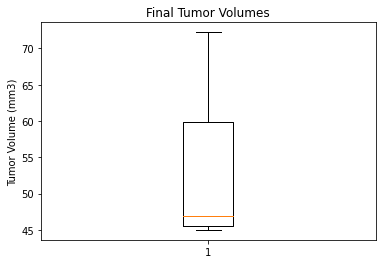

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vols)
plt.show()

## Line and Scatter Plots

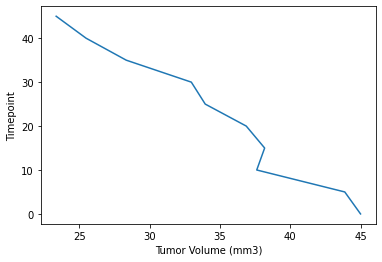

In [48]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = mouse_data.loc[(mouse_data['Drug Regimen'] == 'Capomulin') & (mouse_data['Mouse ID'] == 's185')]
x_values = capomulin_data['Tumor Volume (mm3)']
y_values = capomulin_data['Timepoint']
plt.ylabel('Timepoint')
plt.xlabel('Tumor Volume (mm3)')
plt.plot(x_values,y_values)
plt.show()

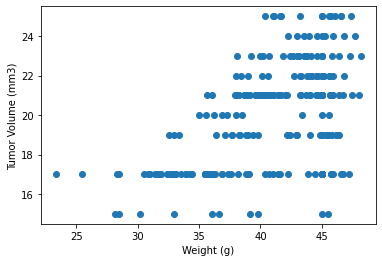

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = mouse_data.loc[mouse_data['Drug Regimen'] == 'Capomulin']
x_values = capomulin_data['Tumor Volume (mm3)']
y_values = capomulin_data['Weight (g)']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_data = mouse_data.loc[mouse_data['Drug Regimen'] == 'Capomulin']
tumor_values = capomulin_data['Tumor Volume (mm3)']
weight_values = capomulin_data['Weight (g)']

correlation = st.pearsonr(weight_values,tumor_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(tumor_values, weight_values)
regress_values = tumor_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [34]:
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The linear regression equation is " + line_eq + ".")

The correlation between both factors is 0.53
The linear regression equation is y = 0.29x + 8.27.
